In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from PIL import Image

import sklearn
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

from mlxtend.plotting import plot_decision_regions

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import plot_model

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Using TensorFlow backend.


In [2]:
num_observations = 10000

x1 = np.random.multivariate_normal([0, 0], [[0.1, 0.2], [0.2, 0.1]], num_observations)
x2 = np.random.multivariate_normal([3, 3], [[0.1, 0.2], [0.2, 0.1]], num_observations)
x3 = np.random.multivariate_normal([3, 0], [[0.1, 0.2], [0.2, 0.1]], num_observations)
x4 = np.random.multivariate_normal([0, 3], [[0.1, 0.2], [0.2, 0.1]], num_observations)

features = np.vstack((x1,x2,x3,x4)).astype(np.float32)
labels = np.hstack((np.full(num_observations, 0), np.full(num_observations, 1), np.full(2*num_observations, 2)))

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.33, random_state=42)

Y_train_one_hot, Y_test_one_hot = np_utils.to_categorical(Y_train), np_utils.to_categorical(Y_test)

print('Train/Test Sizes : ',X_train.shape, X_test.shape, Y_train.shape, Y_test.shape, Y_train_one_hot.shape, Y_test_one_hot.shape)

Train/Test Sizes :  (26800, 2) (13200, 2) (26800,) (13200,) (26800, 3) (13200, 3)


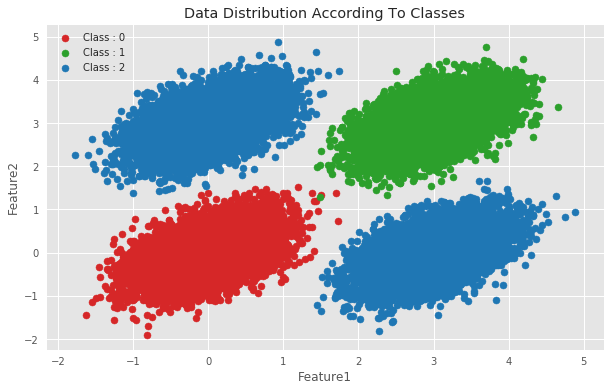

In [3]:
with plt.style.context(('seaborn', 'ggplot')):
    c = ['tab:red', 'tab:green', 'tab:blue']
    plt.figure(figsize=(10,6))
    for i in [0,1,2]:
        plt.scatter(features[labels==i,0], features[labels==i,1], color= c[i], label='Class : %d'%i)
        plt.xlabel('Feature1')
        plt.ylabel('Feature2')
        plt.title('Data Distribution According To Classes')
        plt.legend(loc='best')

In [4]:
def create_nn(layer_sizes, dropout=0.1):
    return Sequential([
                Dense(layer_sizes[0], activation='relu', input_shape=(features.shape[1], )),
                Dropout(dropout),
                Dense(layer_sizes[0], activation='relu'),
                Dropout(dropout),
                Dense(3, activation='softmax')
            ])

# Model1

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________
None


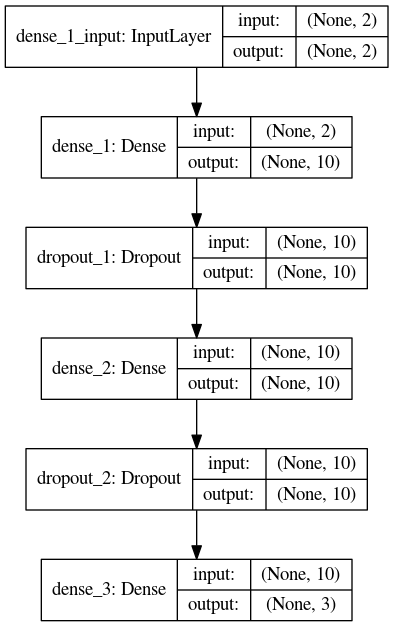

In [5]:
model1 = create_nn([10,10], 0.1)
print(model1.summary())
plot_model(model1, to_file='model1.png', show_shapes=True)
Image.open('model1.png')

## Compile, Fit and Evaluate Model

In [6]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model1.fit(X_train, Y_train_one_hot, batch_size=32, epochs=10, validation_split=0.1)

loss, acc = model1.evaluate(X_test, Y_test_one_hot, verbose=0)
print('\nTest Loss : %.5f, Test Accuracy : %.2f'%(loss, acc))

loss, acc = model1.evaluate(X_train, Y_train_one_hot, verbose=0)
print('Train Loss : %.5f, Train Accuracy : %.2f'%(loss, acc))

Train on 24120 samples, validate on 2680 samples
Epoch 1/10
24120/24120 [==============================] - 2s 71us/step - loss: 0.3456 - accuracy: 0.8875 - val_loss: 0.0231 - val_accuracy: 0.9970
Epoch 2/10
24120/24120 [==============================] - 1s 49us/step - loss: 0.0669 - accuracy: 0.9818 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 3/10
24120/24120 [==============================] - 1s 49us/step - loss: 0.0442 - accuracy: 0.9871 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 4/10
24120/24120 [==============================] - 1s 50us/step - loss: 0.0372 - accuracy: 0.9905 - val_loss: 0.0024 - val_accuracy: 0.9993
Epoch 5/10
24120/24120 [==============================] - 1s 49us/step - loss: 0.0326 - accuracy: 0.9912 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 6/10
24120/24120 [==============================] - 1s 49us/step - loss: 0.0292 - accuracy: 0.9917 - val_loss: 0.0018 - val_accuracy: 0.9993
Epoch 7/10
24120/24120 [==============================] - 1s 49us/ste

## Visualize Decision Boundry

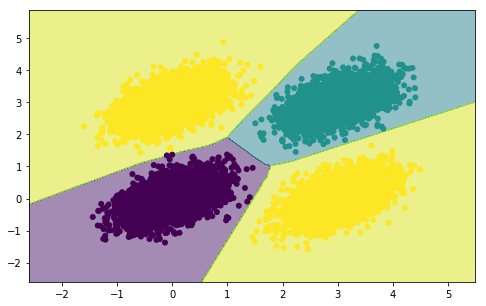

In [7]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    cmap = plt.get_cmap(cmap)
    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict_classes(np.c_[xx.ravel(), yy.ravel()])
    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    plt.figure(figsize=(8,5))
    plt.contourf(xx, yy, z, cmap=cmap, alpha=0.5)
    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)

plot_decision_boundary(X_test, Y_test, model1, cmap='viridis')

# Model2

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                60        
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 20)                420       
_________________________________________________________________
dropout_4 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 63        
Total params: 543
Trainable params: 543
Non-trainable params: 0
_________________________________________________________________
None


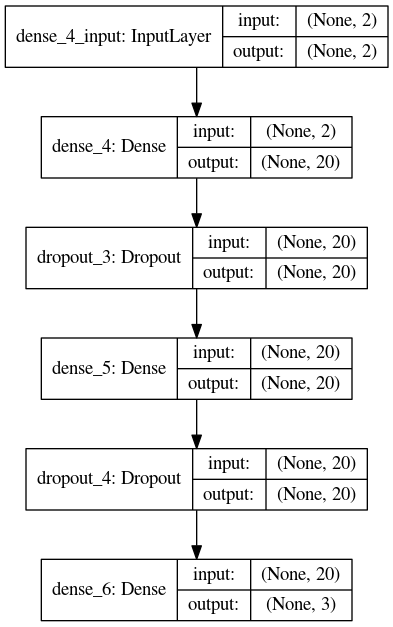

In [8]:
model2 = create_nn([20,30], 0.1)
print(model2.summary())
plot_model(model2, to_file='model2.png', show_shapes=True)
Image.open('model2.png')

## Compile, Fit and Evaluate Model

In [9]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2.fit(X_train, Y_train_one_hot, batch_size=32, epochs=10, validation_split=0.1)

loss, acc = model2.evaluate(X_test, Y_test_one_hot, verbose=0)
print('\nTest Loss : %.5f, Test Accuracy : %.2f'%(loss, acc))

loss, acc = model2.evaluate(X_train, Y_train_one_hot, verbose=0)
print('Train Loss : %.5f, Train Accuracy : %.2f'%(loss, acc))

Train on 24120 samples, validate on 2680 samples
Epoch 1/10
24120/24120 [==============================] - 2s 73us/step - loss: 0.2366 - accuracy: 0.9306 - val_loss: 0.0055 - val_accuracy: 0.9996
Epoch 2/10
24120/24120 [==============================] - 1s 52us/step - loss: 0.0141 - accuracy: 0.9968 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 3/10
24120/24120 [==============================] - 1s 51us/step - loss: 0.0080 - accuracy: 0.9978 - val_loss: 0.0013 - val_accuracy: 0.9996
Epoch 4/10
24120/24120 [==============================] - 1s 57us/step - loss: 0.0065 - accuracy: 0.9985 - val_loss: 2.9188e-04 - val_accuracy: 1.0000
Epoch 5/10
24120/24120 [==============================] - 2s 63us/step - loss: 0.0051 - accuracy: 0.9987 - val_loss: 2.4765e-04 - val_accuracy: 1.0000
Epoch 6/10
24120/24120 [==============================] - 1s 51us/step - loss: 0.0043 - accuracy: 0.9990 - val_loss: 2.8565e-04 - val_accuracy: 1.0000
Epoch 7/10
24120/24120 [==============================] -

## Visualize Decision Boundry

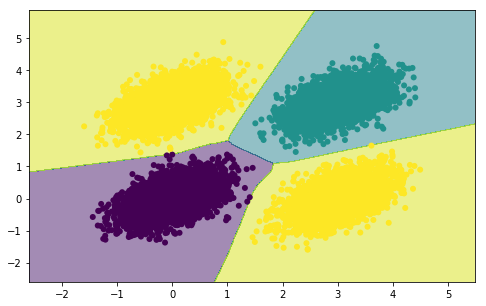

In [10]:
plot_decision_boundary(X_test, Y_test, model2, cmap='viridis')

# Model3

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 50)                150       
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 153       
Total params: 2,853
Trainable params: 2,853
Non-trainable params: 0
_________________________________________________________________
None


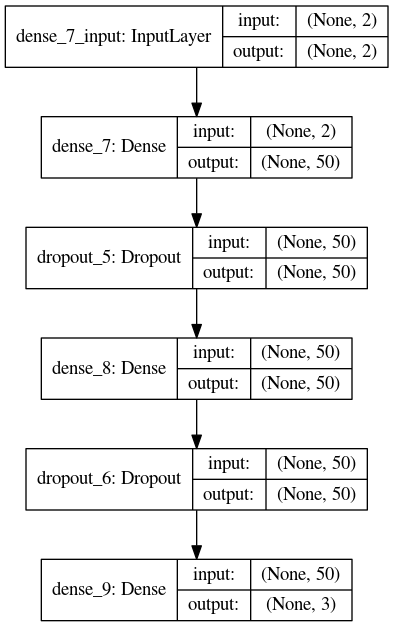

In [11]:
model3 = create_nn([50,50], 0.8)
print(model3.summary())
plot_model(model3, to_file='model3.png', show_shapes=True)
Image.open('model3.png')

## Compile, Fit and Evaluate Model

In [12]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model3.fit(X_train, Y_train_one_hot, batch_size=32, epochs=10, validation_split=0.1)

loss, acc = model3.evaluate(X_test, Y_test_one_hot, verbose=0)
print('\nTest Loss : %.5f, Test Accuracy : %.2f'%(loss, acc))

loss, acc = model3.evaluate(X_train, Y_train_one_hot, verbose=0)
print('Train Loss : %.5f, Train Accuracy : %.2f'%(loss, acc))

Train on 24120 samples, validate on 2680 samples
Epoch 1/10
24120/24120 [==============================] - 2s 63us/step - loss: 0.6824 - accuracy: 0.6963 - val_loss: 0.1203 - val_accuracy: 0.9985
Epoch 2/10
24120/24120 [==============================] - 1s 54us/step - loss: 0.2802 - accuracy: 0.8929 - val_loss: 0.0317 - val_accuracy: 0.9993
Epoch 3/10
24120/24120 [==============================] - 1s 55us/step - loss: 0.1917 - accuracy: 0.9245 - val_loss: 0.0175 - val_accuracy: 0.9993
Epoch 4/10
24120/24120 [==============================] - 1s 55us/step - loss: 0.1631 - accuracy: 0.9333 - val_loss: 0.0170 - val_accuracy: 0.9981
Epoch 5/10
24120/24120 [==============================] - 1s 55us/step - loss: 0.1456 - accuracy: 0.9377 - val_loss: 0.0086 - val_accuracy: 0.9993
Epoch 6/10
24120/24120 [==============================] - 1s 54us/step - loss: 0.1362 - accuracy: 0.9397 - val_loss: 0.0054 - val_accuracy: 0.9996
Epoch 7/10
24120/24120 [==============================] - 1s 54us/ste

## Visualize Decision Boundry

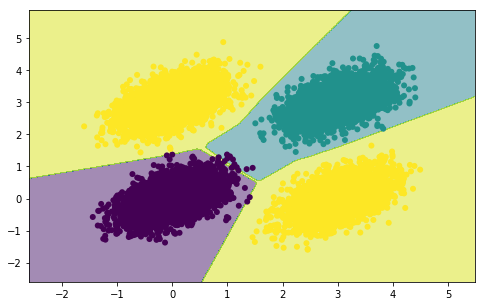

In [13]:
plot_decision_boundary(X_test, Y_test, model3, cmap='viridis')

# Model4

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 50)                150       
_________________________________________________________________
dropout_7 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_8 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 153       
Total params: 2,853
Trainable params: 2,853
Non-trainable params: 0
_________________________________________________________________
None


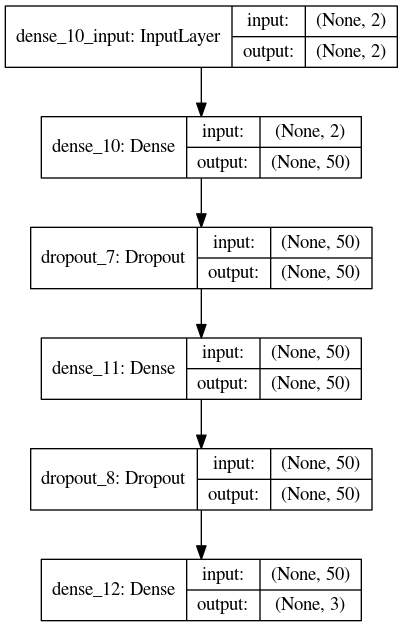

In [14]:
model4 = create_nn([50,50], 0.1)
print(model4.summary())
plot_model(model4, to_file='model4.png', show_shapes=True)
Image.open('model4.png')

## Compile, Fit and Evaluate Model

In [15]:
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model4.fit(X_train, Y_train_one_hot, batch_size=32, epochs=10, validation_split=0.1)

loss, acc = model4.evaluate(X_test, Y_test_one_hot, verbose=0)
print('\nTest Loss : %.5f, Test Accuracy : %.2f'%(loss, acc))

loss, acc = model4.evaluate(X_train, Y_train_one_hot, verbose=0)
print('Train Loss : %.5f, Train Accuracy : %.2f'%(loss, acc))

Train on 24120 samples, validate on 2680 samples
Epoch 1/10
24120/24120 [==============================] - 2s 69us/step - loss: 0.1111 - accuracy: 0.9626 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 2/10
24120/24120 [==============================] - 1s 50us/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 5.7577e-04 - val_accuracy: 1.0000
Epoch 3/10
24120/24120 [==============================] - 1s 51us/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 4.5068e-04 - val_accuracy: 1.0000
Epoch 4/10
24120/24120 [==============================] - 1s 51us/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 2.0409e-04 - val_accuracy: 1.0000
Epoch 5/10
24120/24120 [==============================] - 1s 51us/step - loss: 8.9780e-04 - accuracy: 0.9998 - val_loss: 2.3576e-04 - val_accuracy: 1.0000
Epoch 6/10
24120/24120 [==============================] - 1s 51us/step - loss: 9.1224e-04 - accuracy: 0.9997 - val_loss: 1.2387e-04 - val_accuracy: 1.0000
Epoch 7/10
24120/24120 [=================

## Visualize Decision Boundry

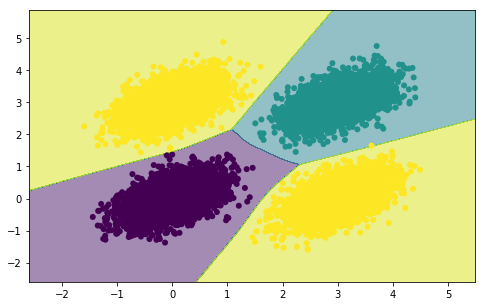

In [16]:
plot_decision_boundary(X_test, Y_test, model4, cmap='viridis')

# Model5

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 100)               300       
_________________________________________________________________
dropout_9 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_10 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 303       
Total params: 10,703
Trainable params: 10,703
Non-trainable params: 0
_________________________________________________________________
None


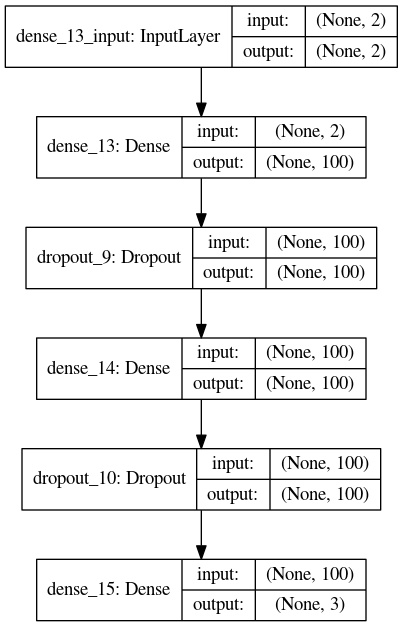

In [17]:
model5 = create_nn([100,100], 0.5)
print(model5.summary())
plot_model(model5, to_file='model5.png', show_shapes=True)
Image.open('model5.png')

## Compile, Fit and Evaluate Model

In [18]:
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model5.fit(X_train, Y_train_one_hot, batch_size=32, epochs=10, validation_split=0.1)

loss, acc = model5.evaluate(X_test, Y_test_one_hot, verbose=0)
print('\nTest Loss : %.5f, Test Accuracy : %.2f'%(loss, acc))

loss, acc = model5.evaluate(X_train, Y_train_one_hot, verbose=0)
print('Train Loss : %.5f, Train Accuracy : %.2f'%(loss, acc))

Train on 24120 samples, validate on 2680 samples
Epoch 1/10
24120/24120 [==============================] - 2s 68us/step - loss: 0.1027 - accuracy: 0.9609 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 2/10
24120/24120 [==============================] - 2s 65us/step - loss: 0.0072 - accuracy: 0.9981 - val_loss: 4.6129e-04 - val_accuracy: 1.0000
Epoch 3/10
24120/24120 [==============================] - 2s 79us/step - loss: 0.0039 - accuracy: 0.9991 - val_loss: 0.0010 - val_accuracy: 0.9993
Epoch 4/10
24120/24120 [==============================] - 2s 63us/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 2.9992e-04 - val_accuracy: 1.0000
Epoch 5/10
24120/24120 [==============================] - 2s 63us/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 3.1409e-04 - val_accuracy: 1.0000
Epoch 6/10
24120/24120 [==============================] - 1s 62us/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 5.7667e-04 - val_accuracy: 0.9996
Epoch 7/10
24120/24120 [=============================

## Visualize Decision Boundry

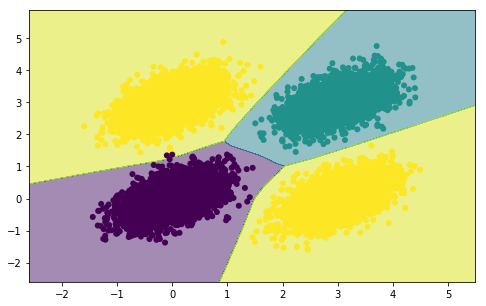

In [19]:
plot_decision_boundary(X_test, Y_test, model5, cmap='viridis')